In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [120]:
# https://archive.ics.uci.edu/ml/datasets/Wine+Quality
df= pd.read_csv('winequality-white.csv', sep=';')

In [121]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Normalizing numerical variables using min max

In [122]:
def find_minmax(df):
    df_dict={}
    for col in df.columns:
        col_min= min(df[col])
        col_max = max(df[col])
        df_dict.update({col: (col_min, col_max)})
    return df_dict

In [123]:
df_dicts= find_minmax(df)

In [124]:
def normalize(value, df_dicts, col):
    a=  value - df_dicts[col][0]
    b = df_dicts[col][1] - df_dicts[col][0]
    return a/b
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_transform=sc.fit_transform(X)

In [125]:
for col in df.columns:
  df[col]= df[col].apply(lambda x: normalize(x, df_dicts, col))

#Getting Target and features ready for training

In [126]:
x=df.iloc[:,0:11]
y=df.iloc[:, 11]

In [127]:
x=x.values

#Multi linear regression from scratch

In [134]:
def loss(y, yhat):
    s=0
    for i in range(len(y)):
      s+=(y[i]-yhat[i])**2
      return s/len(y)

# code for "wx+b"
def predict_y(intercept, coeff, x):
    y_list = []
    for i in range(len(x)):
      y_list.append(intercept + np.dot(coeff, x[i]))
    return np.array(y_list)

#derivative of loss w.r.t weight
def dldw(x,y,yhat):
    s=0
    for i in range(len(y)):
        s+= -x[i] * (y[i]-y_hat[i])
    return (2*s)/len(y)

# derivative of loss w.r.t bias
def dldb(y,y_hat):
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_hat[i])
    return (2*s)/len(y)

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    learning_rate = 0.001
    epoch=1000

    linear_loss=[]
    for i in range(epoch):
      y_hat= predict_y(intercept, weight_vector,x)
      weight_vector = weight_vector - learning_rate *dldw(x,y,y_hat)  #update weight
      intercept = intercept - learning_rate * dldb(y,y_hat) 
      linear_loss.append(loss(y,y_hat))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

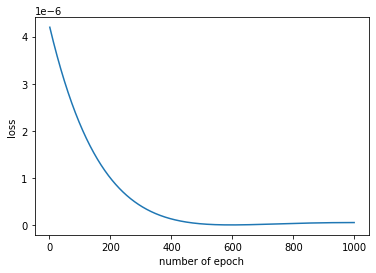

In [135]:
w,b=gradient_descent(x, y)

In [136]:
y_pred=predict_y(b, w, x )

In [137]:
mean_squared_error(y, y_pred)

0.1912397451259283

#Error using scikit-learn SGD Regressor

In [138]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(x,y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

In [139]:
y_pred_sgd=predict_y(model.intercept_, model.coef_, x )


In [140]:
mean_squared_error(y, y_pred_sgd)

0.017398845451290616

#Big difference in accuracy using regularization and stochastic gradient descent with scikit-learn